In [ ]:
import pandas as pd

# Load datasets
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
#sample_submission = pd.read_csv("sample_submission.csv")

# Display basic info
print("Train Data Info:")
print(train_data.info())
print("\nTest Data Info:")
print(test_data.info())

Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84960 entries, 0 to 84959
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            84960 non-null  int64  
 1   Year                          84960 non-null  int64  
 2   Month                         84960 non-null  int64  
 3   Day                           84960 non-null  int64  
 4   kingdom                       84960 non-null  object 
 5   latitude                      84960 non-null  float64
 6   longitude                     84960 non-null  float64
 7   Avg_Temperature               84960 non-null  float64
 8   Avg_Feels_Like_Temperature    84960 non-null  float64
 9   Temperature_Range             84960 non-null  float64
 10  Feels_Like_Temperature_Range  84960 non-null  float64
 11  Radiation                     84960 non-null  float64
 12  Rain_Amount                   84960 non-nul

In [ ]:
# 1. Identify the rows to delete
february_29_rows_index = train_data[(train_data['Month'] == 2) & (train_data['Day'] == 29)].index

# 2. Delete the rows using the index
train_data = train_data.drop(february_29_rows_index)

In [ ]:
print(train_data)

          ID  Year  Month  Day     kingdom   latitude  longitude  \
0          1     1      4    1     Arcadia  24.280002 -37.229980   
1          2     1      4    1    Atlantis  22.979999 -37.329990   
2          3     1      4    1      Avalon  22.880000 -37.130006   
3          4     1      4    1     Camelot  24.180003 -36.929994   
4          5     1      4    1       Dorne  25.780002 -37.530000   
...      ...   ...    ...  ...         ...        ...        ...   
84955  84956     8     12   31    Solstice  25.479998 -36.329990   
84956  84957     8     12   31    Sunspear  26.580005 -37.530000   
84957  84958     8     12   31      Utopia  23.979999 -37.630006   
84958  84959     8     12   31     Valyria  24.280002 -35.729980   
84959  84960     8     12   31  Winterfell  23.979999 -36.429994   

       Avg_Temperature  Avg_Feels_Like_Temperature  Temperature_Range  \
0                25.50                       30.50                8.5   
1               299.65               

In [ ]:
train_data.head(10)

,ID,Year,Month,Day,kingdom,latitude,longitude,Avg_Temperature,Avg_Feels_Like_Temperature,Temperature_Range,Feels_Like_Temperature_Range,Radiation,Rain_Amount,Rain_Duration,Wind_Speed,Wind_Direction,Evapotranspiration,kingdom_encoded
Date,,,,,,,,,,,,,,,,,,
2001-04-01,1,2001,4,1,Arcadia,24.280002,-37.229980,25.50,30.50,8.5,10.3,22.52,58.89,16,8.6,283,1.648659,0
2001-04-01,2,2001,4,1,Atlantis,22.979999,-37.329990,299.65,305.15,5.9,8.2,22.73,11.83,12,15.8,161,1.583094,1
2001-04-01,3,2001,4,1,Avalon,22.880000,-37.130006,26.30,31.50,5.2,6.4,22.73,11.83,12,15.8,161,1.593309,2
2001-04-01,4,2001,4,1,Camelot,24.180003,-36.929994,24.00,28.40,8.2,10.7,22.67,75.27,16,6.4,346,1.638997,3
2001-04-01,5,2001,4,1,Dorne,25.780002,-37.530000,28.00,32.80,5.7,10.2,22.35,4.81,8,16.7,185,1.719189,4
2001-04-01,6,2001,4,1,Eden,23.780002,-37.630006,26.40,31.80,5.8,8.1,21.53,66.17,16,10.0,234,1.611436,5
2001-04-01,7,2001,4,1,El Dorado,23.680003,-37.229980,298.55,303.75,7.5,10.7,21.16,16.77,15,8.7,188,1.583094,6
2001-04-01,8,2001,4,1,Elysium,23.780002,-37.630006,26.30,31.60,5.8,8.0,21.53,66.17,16,10.0,234,1.605430,7
2001-04-01,9,2001,4,1,Emerald City,23.479999,-37.530000,299.55,304.65,5.9,8.6,21.27,40.43,15,12.0,214,1.601406,8


In [ ]:
# Check for missing values
print("\nMissing Values in Train Data:")
print(train_data.isnull().sum())

print("\nMissing Values in Test Data:")
print(test_data.isnull().sum())


Missing Values in Train Data:
ID                              0
Year                            0
Month                           0
Day                             0
kingdom                         0
latitude                        0
longitude                       0
Avg_Temperature                 0
Avg_Feels_Like_Temperature      0
Temperature_Range               0
Feels_Like_Temperature_Range    0
Radiation                       0
Rain_Amount                     0
Rain_Duration                   0
Wind_Speed                      0
Wind_Direction                  0
Evapotranspiration              0
dtype: int64

Missing Values in Test Data:
ID         0
Year       0
Month      0
Day        0
kingdom    0
dtype: int64


In [ ]:
train_data['Year'] = train_data['Year'] + 2000  # Add 2000 to each year value
test_data['Year'] = test_data['Year'] + 2000
# Combine Year, Month, and Day to create a datetime column
train_data['Date'] = pd.to_datetime(train_data[['Year', 'Month', 'Day']].astype(str).agg(lambda x: '{}-{}-{}'.format(str(x[0]).zfill(4), str(x[1]).zfill(2), str(x[2]).zfill(2)), axis=1), format='%Y-%m-%d')
test_data['Date'] = pd.to_datetime(test_data[['Year', 'Month', 'Day']].astype(str).agg(lambda x: '{}-{}-{}'.format(str(x[0]).zfill(4), str(x[1]).zfill(2), str(x[2]).zfill(2)), axis=1), format='%Y-%m-%d')
# Set the Date column as the index
train_data.set_index('Date', inplace=True)
test_data.set_index('Date', inplace=True)


<ipython-input-4-2b5063527255>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  train_data['Date'] = pd.to_datetime(train_data[['Year', 'Month', 'Day']].astype(str).agg(lambda x: '{}-{}-{}'.format(str(x[0]).zfill(4), str(x[1]).zfill(2), str(x[2]).zfill(2)), axis=1), format='%Y-%m-%d')
<ipython-input-4-2b5063527255>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  test_data['Date'] = pd.to_datetime(test_data[['Year', 'Month', 'Day']].astype(str).agg(lambda x: '{}-{}-{}'.format(str(x[0]).zfill(4), str(x[1]).zfill(2), str(x[2]).zfill(2)), axis=1), format='%Y-%m-%d')


               ID  Year  Month  Day     kingdom   latitude  longitude  \
Date                                                                    
2008-12-25  84761  2008     12   25     Krypton  23.780002 -37.630006   
2008-12-25  84762  2008     12   25  Metropolis  23.880000 -37.630006   
2008-12-25  84763  2008     12   25      Midgar  24.880000 -37.729980   
2008-12-25  84764  2008     12   25     Midgard  24.479999 -36.929994   
2008-12-25  84765  2008     12   25      Mordor  23.080005 -36.329990   
...           ...   ...    ...  ...         ...        ...        ...   
2008-12-31  84956  2008     12   31    Solstice  25.479998 -36.329990   
2008-12-31  84957  2008     12   31    Sunspear  26.580005 -37.530000   
2008-12-31  84958  2008     12   31      Utopia  23.979999 -37.630006   
2008-12-31  84959  2008     12   31     Valyria  24.280002 -35.729980   
2008-12-31  84960  2008     12   31  Winterfell  23.979999 -36.429994   

            Avg_Temperature  Avg_Feels_Like_Temper

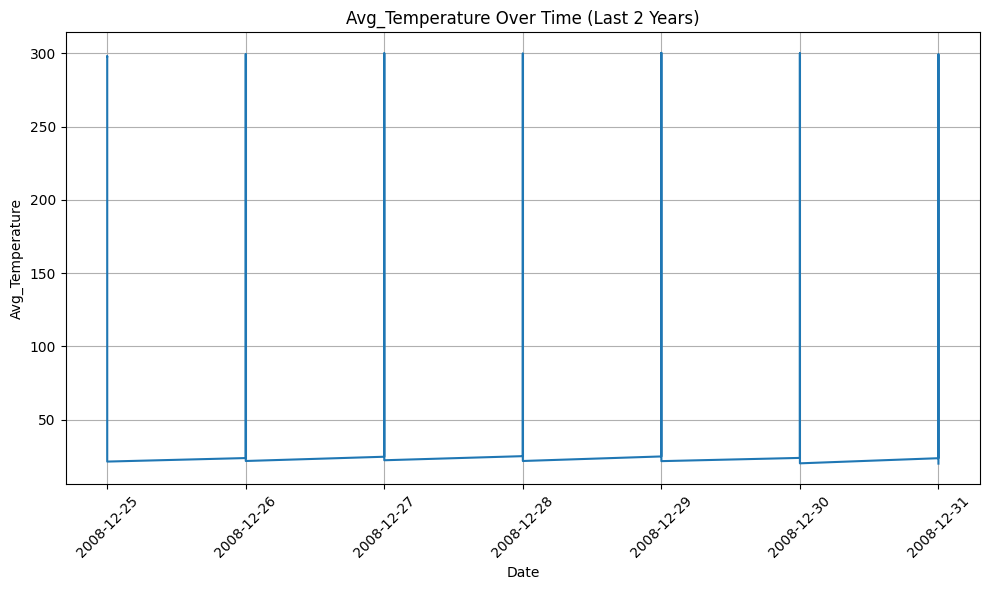

In [ ]:
# prompt: how to plot desired features with date  for 2 years

import matplotlib.pyplot as plt

# Select the features you want to plot
feature = 'Avg_Temperature' # Replace with your actual feature names

# Filter data for the last two years
train_data_2years = train_data.tail(200) # Assuming daily data, adjust if necessary
print(train_data_2years)
# Create the plot

plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.plot(train_data_2years.index, train_data_2years[feature])
plt.xlabel('Date')
plt.ylabel(feature)
plt.title(f'{feature} Over Time (Last 2 Years)')
plt.grid(True)
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()


In [ ]:
test_data.head()

,ID,Year,Month,Day,kingdom,kingdom_encoded
Date,,,,,,
2009-01-01,84961,2009,1,1,Arcadia,0
2009-01-01,84962,2009,1,1,Atlantis,1
2009-01-01,84963,2009,1,1,Avalon,2
2009-01-01,84964,2009,1,1,Camelot,3
2009-01-01,84965,2009,1,1,Dorne,4


In [ ]:
# Import the LabelEncoder class
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
encoder = LabelEncoder()

# Label encode the 'kingdom' column in train and test data
train_data['kingdom_encoded'] = encoder.fit_transform(train_data['kingdom'])
test_data['kingdom_encoded'] = encoder.transform(test_data['kingdom'])

# The 'kingdom_encoded' column now contains the encoded integer labels
# You can drop the original 'kingdom' column if it's no longer needed
train_data_encoded = train_data.drop(columns=['kingdom'])
test_data_encoded = test_data.drop(columns=['kingdom'])

# Show the encoded data
print(train_data_encoded.head())
print(test_data_encoded.head())


            ID  Year  Month  Day   latitude  longitude  Avg_Temperature  \
Date                                                                      
2001-04-01   1  2001      4    1  24.280002 -37.229980            25.50   
2001-04-01   2  2001      4    1  22.979999 -37.329990           299.65   
2001-04-01   3  2001      4    1  22.880000 -37.130006            26.30   
2001-04-01   4  2001      4    1  24.180003 -36.929994            24.00   
2001-04-01   5  2001      4    1  25.780002 -37.530000            28.00   

            Avg_Feels_Like_Temperature  Temperature_Range  \
Date                                                        
2001-04-01                       30.50                8.5   
2001-04-01                      305.15                5.9   
2001-04-01                       31.50                5.2   
2001-04-01                       28.40                8.2   
2001-04-01                       32.80                5.7   

            Feels_Like_Temperature_Range  Radi

In [ ]:
print(pd.unique(train_data_encoded['kingdom_encoded']))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]


In [ ]:
# 2. Normalize the Training Data
from sklearn.preprocessing import MinMaxScaler
# Features to normalize
features_to_normalize = ['Avg_Temperature', 'Radiation', 'Rain_Amount', 'Wind_Speed', 'Wind_Direction']

# Initialize MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Normalize the training data (excluding 'ID', 'Year', 'Month', 'Day', and 'kingdom')
train_data_scaled = scaler.fit_transform(train_data_encoded[features_to_normalize])


# Create a DataFrame for the scaled data
train_data_scaled = pd.DataFrame(train_data_scaled, columns=features_to_normalize, index=train_data.index)

# Add back the 'kingdom_encoded' column, since it wasn't scaled
train_data_scaled['kingdom_encoded']=train_data_encoded['kingdom_encoded']


In [ ]:
train_data_scaled.head()

,Avg_Temperature,Radiation,Rain_Amount,Wind_Speed,Wind_Direction,kingdom_encoded
Date,,,,,,
2001-04-01,0.024206,0.718320,0.133707,0.131524,0.788301,0
2001-04-01,0.985967,0.726124,0.026860,0.281837,0.448468,1
2001-04-01,0.027013,0.726124,0.026860,0.281837,0.448468,2
2001-04-01,0.018944,0.723894,0.170897,0.085595,0.963788,3
2001-04-01,0.032977,0.712003,0.010921,0.300626,0.515320,4


In [ ]:
import numpy as np

def create_sequences(data, seq_length=10):
    x, y = [], []
    for i in range(len(data) - seq_length):
        # Get the current sequence of data
        sequence_features = data.iloc[i:i+seq_length].values

        # Define the target variable (the next time step)
        target = data.iloc[i + seq_length].values

        # Append the sequence and target
        x.append(sequence_features)
        y.append(target)

    return np.array(x), np.array(y)



In [ ]:
# prompt: i want to seperate the data according to the kingdom and then want to train using lstm, give me the code for that
import tensorflow.keras as keras
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# ... (Your existing code for data loading and preprocessing) ...

# Group data by kingdom
kingdoms = train_data_scaled['kingdom_encoded'].unique()
kingdom_data = {}
for kingdom in kingdoms:
    kingdom_data[kingdom] = train_data_scaled[train_data_scaled['kingdom_encoded'] == kingdom]

# Function to create LSTM model
def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(units=50))
    model.add(Dense(units=5))  # Output layer with 5 units (for your 5 features)
    model.compile(optimizer='adam', loss='mse')
    return model

# Train an LSTM model for each kingdom
models = {}
for kingdom in kingdoms:
    print(f"Training model for kingdom {kingdom}...")

    # Prepare data for the current kingdom
    current_kingdom_data = kingdom_data[kingdom]
    features_to_normalize = ['Avg_Temperature', 'Radiation', 'Rain_Amount', 'Wind_Speed', 'Wind_Direction']
    train_kingdom_scaled = current_kingdom_data[features_to_normalize]

    # Create sequences
    x_train_kingdom, y_train_kingdom = create_sequences(train_kingdom_scaled)

    # Split into training and validation sets
    split_idx = int(0.8 * len(x_train_kingdom))
    x_train_k, x_val_k = x_train_kingdom[:split_idx], x_train_kingdom[split_idx:]
    y_train_k, y_val_k = y_train_kingdom[:split_idx], y_train_kingdom[split_idx:]


    # Create and train the LSTM model
    input_shape = (x_train_k.shape[1], x_train_k.shape[2])
    model = create_lstm_model(input_shape)
    model.fit(x_train_k, y_train_k, epochs=10, batch_size=32, validation_data=(x_val_k, y_val_k))

    # Save the trained model
    models[kingdom] = model
    print(f"Model for kingdom {kingdom} trained and saved.")


Training model for kingdom 0...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0437 - val_loss: 0.0097
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0096 - val_loss: 0.0089
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0093 - val_loss: 0.0089
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0096 - val_loss: 0.0087
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0090 - val_loss: 0.0084
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0086 - val_loss: 0.0085
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0086 - val_loss: 0.0089
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0087 - val_loss: 0.0083
Epoch 9/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0083 - val_loss: 0.0081
Epoch 10/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0086 - val_loss: 0.0082
Model for kingdom 0 trained and saved.
Training model for kingdom 1...
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.1508 - val_loss: 0.0177
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0142 - val_loss: 0.0142
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0121 - val_loss: 0.0147
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0111 - val_loss: 0.0132
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0108 - val_loss: 0.0130
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0110 - val_loss: 0.0139
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0109 - val_loss: 0.0125
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0109 - val_loss: 0.0126
Epoch 9/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0105 - val_loss: 0.0140
Epoch 10/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0107 - val_loss: 0.0122
Model for kingdom 1 trained and saved.
Training model for kingdom 2...
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0895 - val_loss: 0.0141
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0121 - val_loss: 0.0138
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0118 - val_loss: 0.0133
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0118 - val_loss: 0.0132
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0105 - val_loss: 0.0126
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0109 - val_loss: 0.0129
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0107 - val_loss: 0.0124
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0109 - val_loss: 0.0130
Epoch 9/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0108 - val_loss: 0.0127
Epoch 10/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0105 - val_loss: 0.0125
Model for kingdom 2 trained and saved.
Training model for kingdom 3...
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0637 - val_loss: 0.0099
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0119 - val_loss: 0.0099
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0113 - val_loss: 0.0095
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0115 - val_loss: 0.0094
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0111 - val_loss: 0.0090
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0111 - val_loss: 0.0090
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0100 - val_loss: 0.0091
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0110 - val_loss: 0.0095
Epoch 9/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0106 - val_loss: 0.0084
Epoch 10/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0108 - val_loss: 0.0086
Model for kingdom 3 trained and saved.
Training model for kingdom 4...
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0683 - val_loss: 0.0145
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0100 - val_loss: 0.0134
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0098 - val_loss: 0.0132
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0092 - val_loss: 0.0131
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0092 - val_loss: 0.0122
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0086 - val_loss: 0.0123
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0087 - val_loss: 0.0119
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0083 - val_loss: 0.0116
Epoch 9/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0082 - val_loss: 0.0113
Epoch 10/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0083 - val_loss: 0.0110
Model for kingdom 4 trained and saved.
Training model for kingdom 5...
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0575 - val_loss: 0.0114
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0119 - val_loss: 0.0109
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0115 - val_loss: 0.0111
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0113 - val_loss: 0.0106
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0110 - val_loss: 0.0107
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0106 - val_loss: 0.0103
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0103 - val_loss: 0.0101
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0100 - val_loss: 0.0100
Epoch 9/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0099 - val_loss: 0.0100
Epoch 10/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0097 - val_loss: 0.0097
Model for kingdom 5 trained and saved.
Training model for kingdom 6...
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.1212 - val_loss: 0.0153
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0144 - val_loss: 0.0153
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0137 - val_loss: 0.0149
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0130 - val_loss: 0.0156
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0134 - val_loss: 0.0145
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0127 - val_loss: 0.0149
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0123 - val_loss: 0.0141
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0126 - val_loss: 0.0143
Epoch 9/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0120 - val_loss: 0.0138
Epoch 10/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0120 - val_loss: 0.0138
Model for kingdom 6 trained and saved.
Training model for kingdom 7...
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0505 - val_loss: 0.0112
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0114 - val_loss: 0.0110
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0116 - val_loss: 0.0107
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0118 - val_loss: 0.0106
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0107 - val_loss: 0.0109
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0110 - val_loss: 0.0103
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0105 - val_loss: 0.0102
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0097 - val_loss: 0.0100
Epoch 9/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0100 - val_loss: 0.0099
Epoch 10/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0104 - val_loss: 0.0097
Model for kingdom 7 trained and saved.
Training model for kingdom 8...
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1231 - val_loss: 0.0134
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0132 - val_loss: 0.0127
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0130 - val_loss: 0.0124
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0120 - val_loss: 0.0119
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0123 - val_loss: 0.0116
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0125 - val_loss: 0.0133
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0118 - val_loss: 0.0112
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0112 - val_loss: 0.0112
Epoch 9/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0112 - val_loss: 0.0111
Epoch 10/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0111 - val_loss: 0.0107
Model for kingdom 8 trained and saved.
Training model for kingdom 9...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0430 - val_loss: 0.0099
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0095 - val_loss: 0.0092
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0092 - val_loss: 0.0089
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0097 - val_loss: 0.0089
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0094 - val_loss: 0.0090
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0092 - val_loss: 0.0086
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0088 - val_loss: 0.0083
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0089 - val_loss: 0.0083
Epoch 9/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0092 - val_loss: 0.0080
Epoch 10/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0085 - val_loss: 0.0081
Model for kingdom 9 trained and saved.
Training model for kingdom 10...
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.1200 - val_loss: 0.0128
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0126 - val_loss: 0.0110
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0119 - val_loss: 0.0110
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0114 - val_loss: 0.0110
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0110 - val_loss: 0.0107
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0115 - val_loss: 0.0107
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0113 - val_loss: 0.0107
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0110 - val_loss: 0.0102
Epoch 9/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0110 - val_loss: 0.0107
Epoch 10/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0103 - val_loss: 0.0100
Model for kingdom 10 trained and saved.
Training model for kingdom 11...
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0567 - val_loss: 0.0133
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0127 - val_loss: 0.0125
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0117 - val_loss: 0.0120
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0122 - val_loss: 0.0119
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0122 - val_loss: 0.0117
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0119 - val_loss: 0.0114
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0117 - val_loss: 0.0112
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0107 - val_loss: 0.0110
Epoch 9/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0107 - val_loss: 0.0111
Epoch 10/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0108 - val_loss: 0.0109
Model for kingdom 11 trained and saved.
Training model for kingdom 12...
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0431 - val_loss: 0.0096
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0101 - val_loss: 0.0094
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0095 - val_loss: 0.0093
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0095 - val_loss: 0.0092
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0092 - val_loss: 0.0089
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0089 - val_loss: 0.0087
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0086 - val_loss: 0.0085
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0085 - val_loss: 0.0083
Epoch 9/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0082 - val_loss: 0.0083
Epoch 10/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0083 - val_loss: 0.0084
Model for kingdom 12 trained and saved.
Training model for kingdom 13...
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0603 - val_loss: 0.0106
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0099 - val_loss: 0.0100
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0093 - val_loss: 0.0101
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0090 - val_loss: 0.0097
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0087 - val_loss: 0.0095
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0090 - val_loss: 0.0097
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0083 - val_loss: 0.0093
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0084 - val_loss: 0.0090
Epoch 9/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0086 - val_loss: 0.0092
Epoch 10/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0086 - val_loss: 0.0088
Model for kingdom 13 trained and saved.
Training model for kingdom 14...
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0695 - val_loss: 0.0125
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0097 - val_loss: 0.0122
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0093 - val_loss: 0.0121
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0091 - val_loss: 0.0119
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0090 - val_loss: 0.0118
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0091 - val_loss: 0.0116
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0086 - val_loss: 0.0118
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0082 - val_loss: 0.0112
Epoch 9/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0083 - val_loss: 0.0112
Epoch 10/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0079 - val_loss: 0.0111
Model for kingdom 14 trained and saved.
Training model for kingdom 15...
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0492 - val_loss: 0.0125
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0127 - val_loss: 0.0124
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0123 - val_loss: 0.0121
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0118 - val_loss: 0.0119
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0118 - val_loss: 0.0120
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0115 - val_loss: 0.0114
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0112 - val_loss: 0.0112
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0113 - val_loss: 0.0112
Epoch 9/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0113 - val_loss: 0.0111
Epoch 10/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0109 - val_loss: 0.0106
Model for kingdom 15 trained and saved.
Training model for kingdom 16...
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0641 - val_loss: 0.0125
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0128 - val_loss: 0.0124
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0123 - val_loss: 0.0123
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0122 - val_loss: 0.0120
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0115 - val_loss: 0.0116
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0111 - val_loss: 0.0114
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0114 - val_loss: 0.0114
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0112 - val_loss: 0.0110
Epoch 9/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0110 - val_loss: 0.0115
Epoch 10/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0109 - val_loss: 0.0110
Model for kingdom 16 trained and saved.
Training model for kingdom 17...
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.1169 - val_loss: 0.0141
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0122 - val_loss: 0.0138
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0118 - val_loss: 0.0129
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0109 - val_loss: 0.0135
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0106 - val_loss: 0.0130
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0102 - val_loss: 0.0124
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0106 - val_loss: 0.0131
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0099 - val_loss: 0.0122
Epoch 9/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0098 - val_loss: 0.0122
Epoch 10/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0100 - val_loss: 0.0118
Model for kingdom 17 trained and saved.
Training model for kingdom 18...
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1076 - val_loss: 0.0127
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0127 - val_loss: 0.0115
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0118 - val_loss: 0.0109
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0120 - val_loss: 0.0110
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0113 - val_loss: 0.0108
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0114 - val_loss: 0.0110
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0107 - val_loss: 0.0109
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0116 - val_loss: 0.0106
Epoch 9/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0110 - val_loss: 0.0103
Epoch 10/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0104 - val_loss: 0.0098
Model for kingdom 18 trained and saved.
Training model for kingdom 19...
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1183 - val_loss: 0.0131
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0142 - val_loss: 0.0114
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0121 - val_loss: 0.0109
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0116 - val_loss: 0.0108
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0114 - val_loss: 0.0110
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0113 - val_loss: 0.0105
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0108 - val_loss: 0.0102
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0105 - val_loss: 0.0099
Epoch 9/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0102 - val_loss: 0.0097
Epoch 10/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0099 - val_loss: 0.0100
Model for kingdom 19 trained and saved.
Training model for kingdom 20...
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1144 - val_loss: 0.0122
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0120 - val_loss: 0.0110
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0116 - val_loss: 0.0110
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0115 - val_loss: 0.0109
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0109 - val_loss: 0.0108
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0114 - val_loss: 0.0104
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0111 - val_loss: 0.0104
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0103 - val_loss: 0.0110
Epoch 9/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0111 - val_loss: 0.0102
Epoch 10/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0097 - val_loss: 0.0100
Model for kingdom 20 trained and saved.
Training model for kingdom 21...
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0997 - val_loss: 0.0113
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0134 - val_loss: 0.0111
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0125 - val_loss: 0.0105
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0128 - val_loss: 0.0100
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0122 - val_loss: 0.0106
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0120 - val_loss: 0.0096
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0124 - val_loss: 0.0096
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0110 - val_loss: 0.0090
Epoch 9/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0108 - val_loss: 0.0089
Epoch 10/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0114 - val_loss: 0.0084
Model for kingdom 21 trained and saved.
Training model for kingdom 22...
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.1194 - val_loss: 0.0134
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0130 - val_loss: 0.0123
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0116 - val_loss: 0.0129
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0119 - val_loss: 0.0126
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0116 - val_loss: 0.0123
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0117 - val_loss: 0.0115
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0122 - val_loss: 0.0117
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0116 - val_loss: 0.0120
Epoch 9/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0109 - val_loss: 0.0112
Epoch 10/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0115 - val_loss: 0.0115
Model for kingdom 22 trained and saved.
Training model for kingdom 23...
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0689 - val_loss: 0.0133
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0128 - val_loss: 0.0123
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0129 - val_loss: 0.0120
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0116 - val_loss: 0.0119
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0117 - val_loss: 0.0120
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0119 - val_loss: 0.0115
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0116 - val_loss: 0.0113
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0112 - val_loss: 0.0113
Epoch 9/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0108 - val_loss: 0.0110
Epoch 10/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0114 - val_loss: 0.0120
Model for kingdom 23 trained and saved.
Training model for kingdom 24...
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0928 - val_loss: 0.0132
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0134 - val_loss: 0.0129
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0129 - val_loss: 0.0136
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0127 - val_loss: 0.0119
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0119 - val_loss: 0.0117
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0116 - val_loss: 0.0114
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0114 - val_loss: 0.0118
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0111 - val_loss: 0.0114
Epoch 9/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0114 - val_loss: 0.0124
Epoch 10/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0113 - val_loss: 0.0111
Model for kingdom 24 trained and saved.
Training model for kingdom 25...
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0568 - val_loss: 0.0157
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0101 - val_loss: 0.0153
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0104 - val_loss: 0.0157
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0098 - val_loss: 0.0147
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0091 - val_loss: 0.0143
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0088 - val_loss: 0.0142
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0089 - val_loss: 0.0139
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0089 - val_loss: 0.0138
Epoch 9/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0088 - val_loss: 0.0133
Epoch 10/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0083 - val_loss: 0.0131
Model for kingdom 25 trained and saved.
Training model for kingdom 26...
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0650 - val_loss: 0.0160
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0097 - val_loss: 0.0152
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0095 - val_loss: 0.0152
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0098 - val_loss: 0.0151
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0087 - val_loss: 0.0141
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0086 - val_loss: 0.0138
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0082 - val_loss: 0.0135
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0083 - val_loss: 0.0145
Epoch 9/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0081 - val_loss: 0.0130
Epoch 10/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0084 - val_loss: 0.0127
Model for kingdom 26 trained and saved.
Training model for kingdom 27...
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.1023 - val_loss: 0.0118
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0119 - val_loss: 0.0110
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0121 - val_loss: 0.0112
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0112 - val_loss: 0.0108
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0110 - val_loss: 0.0108
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0106 - val_loss: 0.0104
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0109 - val_loss: 0.0105
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0104 - val_loss: 0.0102
Epoch 9/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0105 - val_loss: 0.0101
Epoch 10/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0111 - val_loss: 0.0102
Model for kingdom 27 trained and saved.
Training model for kingdom 28...
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0446 - val_loss: 0.0213
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0124 - val_loss: 0.0208
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0117 - val_loss: 0.0206
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0122 - val_loss: 0.0202
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0116 - val_loss: 0.0202
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0114 - val_loss: 0.0198
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0109 - val_loss: 0.0198
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0106 - val_loss: 0.0192
Epoch 9/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0106 - val_loss: 0.0195
Epoch 10/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0100 - val_loss: 0.0193
Model for kingdom 28 trained and saved.
Training model for kingdom 29...
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0750 - val_loss: 0.0117
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0118 - val_loss: 0.0115
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0113 - val_loss: 0.0111
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0110 - val_loss: 0.0109
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0110 - val_loss: 0.0108
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0104 - val_loss: 0.0108
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0107 - val_loss: 0.0105
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0107 - val_loss: 0.0106
Epoch 9/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0101 - val_loss: 0.0103
Epoch 10/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0101 - val_loss: 0.0102
Model for kingdom 29 trained and saved.


In [ ]:
train_kingdom_scaled.head()

,Avg_Temperature,Radiation,Rain_Amount,Wind_Speed,Wind_Direction
Date,,,,,
2001-04-01,0.015436,0.694166,0.025679,0.171190,0.465181
2001-04-02,0.015436,0.787068,0.023613,0.158664,0.632312
2001-04-03,0.016488,0.633222,0.050472,0.052192,0.986072
2001-04-04,0.019996,0.804534,0.001476,0.070981,0.857939
2001-04-05,0.019996,0.789669,0.002656,0.118998,0.506964


In [ ]:
import pandas as pd
import numpy as np

# Function to create sequences for testing
def create_sequences(data, window_size=10):
    x = []
    for i in range(len(data) - window_size + 1):  # +1 to include the last sequence
        x.append(data.iloc[i:i + window_size].values)
    return np.array(x)

# Store predictions
predictions_dict = {}
window_size = 10
for kingdom in kingdoms:
    print(f"Predicting for kingdom {kingdom}...")

    # Get training data for the current kingdom and take the last 10 entries
    kingdom_train_data = train_data_scaled[train_data_scaled['kingdom_encoded'] == kingdom]
    last_train_entries = kingdom_train_data.iloc[-window_size:]

    # Get test data for the kingdom
    test_kingdom_data = test_data_encoded[test_data_encoded['kingdom_encoded'] == kingdom]
    #print(test_kingdom_data.head())
    # Combine the last 10 training entries with the test data for the kingdom
    full_test_data = pd.concat([last_train_entries, test_kingdom_data], axis=0)
    print(full_test_data.head())
    # Create test sequences
    x_test = create_sequences(full_test_data, window_size)

    # Remove sequences containing only training data
    x_test = x_test[len(last_train_entries) - window_size + 1:]  # Adjust to align predictions
    #print(x_test[0])
    # Predict using the trained LSTM model
    model = models[kingdom]
    predictions = model.predict(x_test)

    # Inverse transform predictions
    predictions = scaler.inverse_transform(predictions)
    #print(predictions)
    # Store predictions, ensuring index alignment
    predictions_df = pd.DataFrame(predictions, columns=features_to_normalize)
    predictions_df.index = test_kingdom_data.index[:len(predictions_df)]  # Align index
    predictions_dict[kingdom] = predictions_df

# Combine all predictions
final_predictions = pd.concat(predictions_dict.values())

# Save to submission.csv
final_predictions.to_csv("submission.csv")
print(len(final_predictions))
print("Predictions saved to submission.csv")


Predicting for kingdom 0...
            Avg_Temperature  Radiation  Rain_Amount  Wind_Speed  \
Date                                                              
2008-12-22         0.019646   0.450019     0.014758    0.229645   
2008-12-23         0.019996   0.555556     0.007674    0.252610   
2008-12-24         0.021049   0.527313     0.033943    0.200418   
2008-12-25         0.015787   0.070606     0.063459    0.144050   
2008-12-26         0.018593   0.464883     0.044569    0.139875   

            Wind_Direction  kingdom_encoded  ID  Year  Month  Day  
Date                                                               
2008-12-22        0.197772                0 NaN   NaN    NaN  NaN  
2008-12-23        0.164345                0 NaN   NaN    NaN  NaN  
2008-12-24        0.061281                0 NaN   NaN    NaN  NaN  
2008-12-25        0.665738                0 NaN   NaN    NaN  NaN  
2008-12-26        0.431755                0 NaN   NaN    NaN  NaN  
5/5 ━━━━━━━━━━━━━━━━━━━━ 0

In [ ]:
import pandas as pd
import numpy as np

# Function to create sequences for testing
def create_sequences(data, window_size=10):
    x = []
    for i in range(len(data) - window_size + 1):  # +1 to include the last sequence
        x.append(data.iloc[i:i + window_size].values)
    return np.array(x)

# Store predictions
predictions_dict = {}
window_size = 10

# Iterate over all kingdoms
for kingdom in kingdoms:
    print(f"Predicting for kingdom {kingdom}...")

    # Get the training data for the current kingdom
    kingdom_train_data = train_data_scaled[train_data_scaled['kingdom_encoded'] == kingdom]
    last_train_entries = kingdom_train_data.iloc[-window_size:]  # Last 10 rows from training data

    # Get test data for the current kingdom
    test_kingdom_data = test_data_encoded[test_data_encoded['kingdom_encoded'] == kingdom]
    predictions = []

    for idx in range(len(test_kingdom_data)):
        # Combine last 10 training rows with the current test row
        full_test_data = pd.concat([last_train_entries, test_kingdom_data.iloc[idx:idx+1]], axis=0)

        # Create sequences for the model
        x_test = create_sequences(full_test_data, window_size)
        x_test = x_test[len(last_train_entries) - window_size + 1:]  # Align the sequence for prediction

        # Predict using the trained LSTM model
        model = models[kingdom]
        pred = model.predict(x_test)

        # Inverse transform predictions
        pred = scaler.inverse_transform(pred)

        # Store predictions for each test row
        predictions.append(pred[0])

        # Update the last training entries for the next prediction by shifting the window
        last_train_entries = pd.concat([last_train_entries.iloc[1:], test_kingdom_data.iloc[idx:idx+1]])

    # Store predictions, ensuring the index aligns with the test data
    predictions_df = pd.DataFrame(predictions, columns=features_to_normalize)

    # Add the ID from the original test data for this kingdom
    predictions_df['ID'] = test_kingdom_data['ID'].values

    predictions_dict[kingdom] = predictions_df

# Combine all predictions
final_predictions = pd.concat(predictions_dict.values())

# Reorder columns: ID first, then the prediction features
final_predictions = final_predictions[['ID'] + features_to_normalize]

# Save to submission.csv
final_predictions.to_csv("submission.csv", index=False)

print(f"Predictions saved to submission.csv with {len(final_predictions)} entries.")


Predicting for kingdom 0...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━

In [ ]:
import pandas as pd
import numpy as np

# Function to create sequences for testing
def create_sequences(data, window_size=10):
    x = []
    for i in range(len(data) - window_size + 1):  # +1 to include the last sequence
        x.append(data.iloc[i:i + window_size].values)
    return np.array(x)

# Store predictions
predictions_dict = {}
window_size = 10

# Precompute sequences for all kingdoms first
test_sequences_dict = {}
for kingdom in kingdoms:
    print(f"Precomputing sequences for kingdom {kingdom}...")

    # Get test data for the current kingdom
    test_kingdom_data = test_data_encoded[test_data_encoded['kingdom_encoded'] == kingdom]

    # Create sequences for the test data
    x_test = create_sequences(test_kingdom_data, window_size)

    # Store the sequences
    test_sequences_dict[kingdom] = x_test

# Iterate over all kingdoms and make predictions
for kingdom in kingdoms:
    print(f"Predicting for kingdom {kingdom}...")

    # Get test data for the current kingdom
    test_kingdom_data = test_data_encoded[test_data_encoded['kingdom_encoded'] == kingdom]

    # Get the precomputed sequences for this kingdom
    x_test = test_sequences_dict[kingdom]

    # Predict using the trained LSTM model in batches
    model = models[kingdom]
    predictions = model.predict(x_test)

    # Inverse transform predictions
    predictions = scaler.inverse_transform(predictions)

    # Create a DataFrame for predictions
    predictions_df = pd.DataFrame(predictions, columns=features_to_normalize)

    # Ensure predictions match the number of test rows by slicing or adding padding
    if len(predictions_df) < len(test_kingdom_data):
        # Pad predictions if there are fewer predictions than test rows
        padding = np.zeros((len(test_kingdom_data) - len(predictions_df), len(features_to_normalize)))
        predictions_df = pd.DataFrame(np.vstack([predictions_df.values, padding]), columns=features_to_normalize)
    else:
        # Trim predictions if there are more predictions than test rows
        predictions_df = predictions_df.iloc[:len(test_kingdom_data)]

    # Add the ID from the original test data for this kingdom
    predictions_df['ID'] = test_kingdom_data['ID'].values

    # Store predictions for this kingdom
    predictions_dict[kingdom] = predictions_df

# Combine all predictions
final_predictions = pd.concat(predictions_dict.values())

# Reorder columns: ID first, then the prediction features
final_predictions = final_predictions[['ID'] + features_to_normalize]

# Save to submission.csv
final_predictions.to_csv("submission.csv", index=False)

print(f"Predictions saved to submission.csv with {len(final_predictions)} entries.")


Precomputing sequences for kingdom 0...
Precomputing sequences for kingdom 1...
Precomputing sequences for kingdom 2...
Precomputing sequences for kingdom 3...
Precomputing sequences for kingdom 4...
Precomputing sequences for kingdom 5...
Precomputing sequences for kingdom 6...
Precomputing sequences for kingdom 7...
Precomputing sequences for kingdom 8...
Precomputing sequences for kingdom 9...
Precomputing sequences for kingdom 10...
Precomputing sequences for kingdom 11...
Precomputing sequences for kingdom 12...
Precomputing sequences for kingdom 13...
Precomputing sequences for kingdom 14...
Precomputing sequences for kingdom 15...
Precomputing sequences for kingdom 16...
Precomputing sequences for kingdom 17...
Precomputing sequences for kingdom 18...
Precomputing sequences for kingdom 19...
Precomputing sequences for kingdom 20...
Precomputing sequences for kingdom 21...
Precomputing sequences for kingdom 22...
Precomputing sequences for kingdom 23...
Precomputing sequences for

1/5 ━━━━━━━━━━━━━━━━━━━━ 1s 315ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step
Predicting for kingdom 2...
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step
Predicting for kingdom 3...
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step
Predicting for kingdom 4...
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step
Predicting for kingdom 5...
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step
Predicting for kingdom 6...
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step
Predicting for kingdom 7...
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step
Predicting for kingdom 8...
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step
Predicting for kingdom 9...
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step
Predicting for kingdom 10...
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step
Predicting for kingdom 11...
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step
Predicting for kingdom 12...
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step
Predicting for kingdom 13...
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step
Predicting for kingdom 14...
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step
Predicting for kingdom 15...
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step
Predicting for kingdom 16...


In [ ]:
final_predictions.head()

,ID,Avg_Temperature,Radiation,Rain_Amount,Wind_Speed,Wind_Direction
0,84961,-43.717274,25.960611,-41.659279,-22.088938,-128.017731
1,84991,-43.717274,25.960611,-41.659279,-22.088938,-128.017731
2,85021,-43.717274,25.960611,-41.659279,-22.088938,-128.017731
3,85051,-43.717274,25.960611,-41.659279,-22.088938,-128.017731
4,85081,-43.717274,25.960611,-41.659279,-22.088938,-128.017731


In [ ]:
# prompt: how to get the results for the test data now?

"""# Preprocess the test data in the same way as the training data
test_data['Year'] = test_data['Year'] + 2000
test_data['Date'] = pd.to_datetime(test_data[['Year', 'Month', 'Day']].astype(str).agg(lambda x: '{}-{}-{}'.format(str(x[0]).zfill(4), str(x[1]).zfill(2), str(x[2]).zfill(2)), axis=1), format='%Y-%m-%d')
test_data.set_index('Date', inplace=True)
test_data['kingdom_encoded'] = encoder.transform(test_data['kingdom'])
test_data_encoded = test_data.drop(columns=['kingdom'])"""

# Scale the test data using the same scaler fitted on the training data
#test_data_scaled = scaler.transform(test_data_encoded[features_to_normalize])
#test_data_scaled = pd.DataFrame(test_data_scaled, columns=features_to_normalize, index=test_data.index)

# Create sequences for the test data
x_test, _ = create_sequences(test_data_encoded)

# Make predictions for each kingdom
predictions = []
for i in range(len(x_test)):
    kingdom_encoded = test_data_encoded['kingdom_encoded'].iloc[i]  #get kingdom for current datapoint
    model = models[kingdom_encoded] # Get the corresponding model
    prediction = model.predict(np.expand_dims(x_test[i], axis=0)) #Predict
    predictions.append(prediction[0])

# Inverse transform the predictions to get the original scale
predictions = np.array(predictions)
predictions = scaler.inverse_transform(predictions)

# Create a DataFrame for the predictions
predictions_df = pd.DataFrame(predictions, columns=features_to_normalize, index=test_data_encoded.index[10:])

#Print or save the predictions
predictions_df


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

,Avg_Temperature,Radiation,Rain_Amount,Wind_Speed,Wind_Direction
Date,,,,,
2009-01-01,-190.685913,-0.055176,-115.446075,-16.277281,-980.633545
2009-01-01,12940.039062,564.760193,3272.305664,833.687378,14582.292969
2009-01-01,6813.672852,543.419739,3190.830566,817.952454,15583.506836
2009-01-01,5693.760742,478.599518,3216.025879,503.099701,14939.522461
2009-01-01,-322.935059,-21.569424,71.566513,-63.615788,-816.641602
...,...,...,...,...,...
2009-05-31,6744.601562,520.288330,4043.443848,679.028259,15831.050781
2009-05-31,7094.993164,523.012695,4026.324951,679.657288,16228.408203
2009-05-31,12378.181641,564.478149,3257.302490,837.643921,15305.751953


In [ ]:
# prompt: give me the code to get the submission.csv

# Create a DataFrame for the submission
submission_df = pd.DataFrame(predictions, columns=features_to_normalize)
submission_df.index = test_data.index[10:]

#Save the submission file
submission_df.to_csv("submission.csv")


In [ ]:
# 4. Build the LSTM Model
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])),
    tf.keras.layers.LSTM(32, activation='relu'),
    tf.keras.layers.Dense(5)  # 5 output units for each environmental variable
])

model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# 5. Train the Model

model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_val, y_val))


Epoch 1/50
2124/2124 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - loss: 0.0025 - val_loss: 0.0040
Epoch 2/50
2124/2124 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - loss: 0.0025 - val_loss: 0.0040
Epoch 3/50
2124/2124 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step - loss: 0.0026 - val_loss: 0.0040
Epoch 4/50
2124/2124 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - loss: 0.0024 - val_loss: 0.0040
Epoch 5/50
2124/2124 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - loss: 0.0024 - val_loss: 0.0040
Epoch 6/50
2124/2124 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - loss: 0.0024 - val_loss: 0.0039
Epoch 7/50
2124/2124 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step - loss: 0.0025 - val_loss: 0.0040
Epoch 8/50
2124/2124 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - loss: 0.0024 - val_loss: 0.0039
Epoch 9/50
2124/2124 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - loss: 0.0024 - val_loss: 0.0040
Epoch 10/50
2124/2124 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - loss: 0.0023 - val_loss: 0.0041
Epoch 11/50
2124/2124 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step - loss: 0.0023 - val_loss: 0.0040
Epoch 12/50


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict on validation data
y_val_pred = model.predict(x_val)

# Inverse transform the predictions and actual values to the original scale
y_val_pred_rescaled = scaler.inverse_transform(y_val_pred)
y_val_rescaled = scaler.inverse_transform(y_val)

# Compute evaluation metrics
mae = mean_absolute_error(y_val_rescaled, y_val_pred_rescaled)
mse = mean_squared_error(y_val_rescaled, y_val_pred_rescaled)
rmse = np.sqrt(mse)
r2 = r2_score(y_val_rescaled, y_val_pred_rescaled)

# Print results
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


531/531 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Mean Absolute Error (MAE): 5.7580
Mean Squared Error (MSE): 336.7766
Root Mean Squared Error (RMSE): 18.3515
R² Score: 0.8543


In [ ]:
# 1. Preprocess the Test Data
# Create sequences for the test data with the same sequence length as used during training
# Assuming seq_length = 10 from your create_sequences function
seq_length = 10
# Create dummy input for features and repeat kingdom_encoded values to match sequence length
dummy_features = np.zeros((test_data_encoded.shape[0], seq_length, len(features_to_normalize)))
kingdom_sequence = np.repeat(test_data_encoded[['kingdom_encoded']].values.reshape(-1, 1, 1), seq_length, axis=1)

# Combine dummy features and kingdom sequence
x_test = np.concatenate([dummy_features, kingdom_sequence], axis=2)

# Reshape the input to match the model's expected input shape
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2]) # Reshape to (samples, seq_length, features)

In [ ]:
# 2. Make Predictions Using the Model
predictions = model.predict(x_test)

# ... (rest of your prediction code)

# 3. If the target features were scaled during training, you need to inverse transform the predictions
# Assuming you scaled the training data features using MinMaxScaler
predictions_rescaled = scaler.inverse_transform(predictions)

# 4. Convert predictions into DataFrame for easy interpretation
predictions_df = pd.DataFrame(predictions_rescaled, columns=features_to_normalize, index=test_data.index)

# Show the predictions
print(predictions_df)

In [ ]:
# 9. Prepare the Submission File

# Creating the submission DataFrame
# Adjust the ID column to match the length of the predictions
submission = pd.DataFrame({
    'ID': test_data['ID'].iloc[:len(predictions_rescaled)],  # Select only the first 'len(predictions_rescaled)' IDs
    'Avg_Temperature': predictions_rescaled[:, 0],
    'Radiation': predictions_rescaled[:, 1],
    'Rain_Amount': predictions_rescaled[:, 2],
    'Wind_Speed': predictions_rescaled[:, 3],
    'Wind_Direction': predictions_rescaled[:, 4]
})

# Save to a CSV file for submission
submission.to_csv('submission.csv', index=False)

# Print submission sample
print(submission.head())

               ID  Avg_Temperature  Radiation  Rain_Amount  Wind_Speed  \
Date                                                                     
2001-09-01  84961        51.268990  10.726555    12.979812    7.549273   
2001-09-01  84962        27.824921  10.614876    30.358007    9.438584   
2001-09-01  84963        24.897097   6.701020    42.289803   12.337826   
2001-09-01  84964        23.495899   9.702186    27.910046    7.174178   
2001-09-01  84965        26.935947  11.315587    26.467468    5.540480   

            Wind_Direction  
Date                        
2001-09-01      105.208267  
2001-09-01      180.874649  
2001-09-01      107.524055  
2001-09-01       86.002525  
2001-09-01      171.575806  


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Load datasets
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

# Combine Year, Month, and Day to create a datetime column
train_data['Date'] = pd.to_datetime(train_data[['Year', 'Month', 'Day']].astype(str).agg('-'.join, axis=1))
test_data['Date'] = pd.to_datetime(test_data[['Year', 'Month', 'Day']].astype(str).agg('-'.join, axis=1))

# Set Date as index (for ordering, not used in features)
train_data.set_index('Date', inplace=True)
test_data.set_index('Date', inplace=True)

# Encode 'kingdom'
encoder = LabelEncoder()
train_data['kingdom_encoded'] = encoder.fit_transform(train_data['kingdom'])
test_data['kingdom_encoded'] = encoder.transform(test_data['kingdom'])

# Drop original 'kingdom' column
train_data_encoded = train_data.drop(columns=['kingdom'])
test_data_encoded = test_data.drop(columns=['kingdom'])

# Define the environmental features to normalize
features_to_normalize = ['Avg_Temperature', 'Radiation', 'Rain_Amount', 'Wind_Speed', 'Wind_Direction']

# Normalize training features
scaler = MinMaxScaler()
train_data_scaled = scaler.fit_transform(train_data_encoded[features_to_normalize])

# Convert back to DataFrame
train_data_scaled = pd.DataFrame(train_data_scaled, columns=features_to_normalize, index=train_data.index)

# Create sequences for training
def create_sequences(data, kingdom_data, seq_length=20):
    x, y = [], []
    for i in range(len(data) - seq_length):
        sequence_features = data.iloc[i:i+seq_length].values
        kingdom_sequence = kingdom_data.iloc[i:i+seq_length].values.reshape(-1, 1)
        sequence_features = np.concatenate([sequence_features, kingdom_sequence], axis=1)
        target = data.iloc[i + seq_length].values
        x.append(sequence_features)
        y.append(target)
    return np.array(x), np.array(y)

# Extract kingdom_encoded column separately
train_kingdom_encoded = train_data_encoded[['kingdom_encoded']]
x_train, y_train = create_sequences(train_data_scaled, train_kingdom_encoded)

# Train-validation split (80-20)
split_idx = int(0.8 * len(x_train))
x_train, x_val = x_train[:split_idx], x_train[split_idx:]
y_train, y_val = y_train[:split_idx], y_train[split_idx:]

# Define LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])),
    tf.keras.layers.LSTM(32, activation='relu'),
    tf.keras.layers.Dense(len(features_to_normalize))
])
model.compile(optimizer='adam', loss='mse')

# Train model
model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_val, y_val))

# ✅ **Preprocess Test Data Using Recent Training Sequences**
seq_length = 20

# Get the last `seq_length` rows from training data to start sequences
last_train_features = train_data_scaled.iloc[-seq_length:].values
last_train_kingdom = train_kingdom_encoded.iloc[-seq_length:].values.reshape(-1, 1)

x_test = []
for i in range(len(test_data_encoded)):
    # Append last sequence with test 'kingdom_encoded' value
    sequence_features = np.vstack([last_train_features, np.zeros((seq_length, len(features_to_normalize)))])
    sequence_kingdom = np.vstack([last_train_kingdom, np.full((seq_length, 1), test_data_encoded.iloc[i]['kingdom_encoded'])])

    # Combine features and kingdom
    test_sequence = np.concatenate([sequence_features, sequence_kingdom], axis=1)

    # Keep only the last `seq_length` rows
    x_test.append(test_sequence[-seq_length:])

# Convert test data to numpy array
x_test = np.array(x_test)

# Make predictions
predictions = model.predict(x_test)

# Rescale predictions to original scale
predictions_rescaled = scaler.inverse_transform(predictions)

# Create submission DataFrame
submission = pd.DataFrame({
    'ID': test_data['ID'],
    'Avg_Temperature': predictions_rescaled[:, 0],
    'Radiation': predictions_rescaled[:, 1],
    'Rain_Amount': predictions_rescaled[:, 2],
    'Wind_Speed': predictions_rescaled[:, 3],
    'Wind_Direction': predictions_rescaled[:, 4]
})

# Save to CSV
submission.to_csv('submission.csv', index=False)

# Print sample submission
print(submission.head())


<ipython-input-28-c892dd38daeb>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data['Date'] = pd.to_datetime(train_data[['Year', 'Month', 'Day']].astype(str).agg('-'.join, axis=1))
<ipython-input-28-c892dd38daeb>:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_data['Date'] = pd.to_datetime(test_data[['Year', 'Month', 'Day']].astype(str).agg('-'.join, axis=1))


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2124/2124 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - loss: 1.5252 - val_loss: 0.0154
Epoch 2/100
2124/2124 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - loss: 0.0117 - val_loss: 0.0094
Epoch 3/100
2124/2124 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - loss: 0.0078 - val_loss: 0.0081
Epoch 4/100
2124/2124 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - loss: 0.0069 - val_loss: 0.0075
Epoch 5/100
2124/2124 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.0065 - val_loss: 0.0072
Epoch 6/100
2124/2124 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.0060 - val_loss: 0.0061
Epoch 7/100
2124/2124 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - loss: 0.0054 - val_loss: 0.0058
Epoch 8/100
2124/2124 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - loss: 0.0051 - val_loss: 0.0055
Epoch 9/100
2124/2124 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.0047 - val_loss: 0.0058
Epoch 10/100
2124/2124 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.0043 - val_loss: 0.0055
Epoch 11/100
2124/2124 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - loss: 0.0041 - val_loss: 0.0050
Epoch 12/100
2124/21